# Quick Guide to the Code

This Jupyter Notebook is a guide to most commom and useful functions in the project and how to use them.

More information about the physics and implementation of the code can be found in [Future Paper](https://)

In [1]:
#Importing Libraries
from Plots import *
import matplotlib.pyplot as plt
import time 

# 0. Solar Neutrinos Precession

The solver for the Solar neutrinos scenario is called *solar_solver* and it is implemented in the file [`ODE_Solar.py`](ODE_Solar.py). Its input and output are the following:

* **Input**: 
    - Neutrino Energy [MeV], 
    - Initial Radius [$R_\odot$]
    - Final Radius [$R_\odot$]

* **Output**: 
    - Neutrino $\vec{P}$ Polarization Vector Array [3 Components][Radius Bins], 
    - Hamiltonian $\vec{B}$ Polarization Vector Array [3 Components][Radius Bins]
    - Radius Array [$R_\odot$]

In [2]:
from ODE_Solar import solver_solar

E_high=30 #Mev
E_low=0.1 #Mev
r_i,r_f =0,1 #R_solar

P_high,B_high,r_per_R_sol=solver_solar(E_high,r_i,r_f)
P_low,B_low,r_per_R_sol=solver_solar(E_low,r_i,r_f)

### Probability Plots

Here we plot the survival and conversion probability of the neutrino as a function of the propagated radius. We also compare it to the expected analytical averaged probabilities.

For **high energy** neutrinos:

$$
\left < P^{High}_{\nu_e \rightarrow \nu_e} \right > \approx \frac{1}{2} - \frac{1}{2} \cos{2\theta}= \sin^2{\theta}
$$

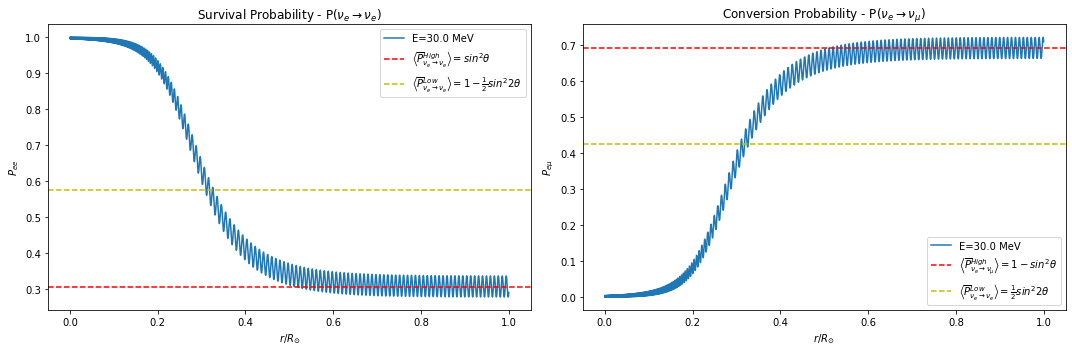

In [4]:
Plot_Probability_Solar(P_high[2],r_per_R_sol,E_high)

In [5]:
ani=Pol_Vec_Anim_Solar(P_high,B_high,r_per_R_sol,E_high)
HTML(ani.to_html5_video())

For **low energy** neutrinos:

$$
\left < P^{Low}_{\nu_e \rightarrow \nu_e} \right > \approx 1 - \frac{1}{2} \sin^2{2\theta}
$$

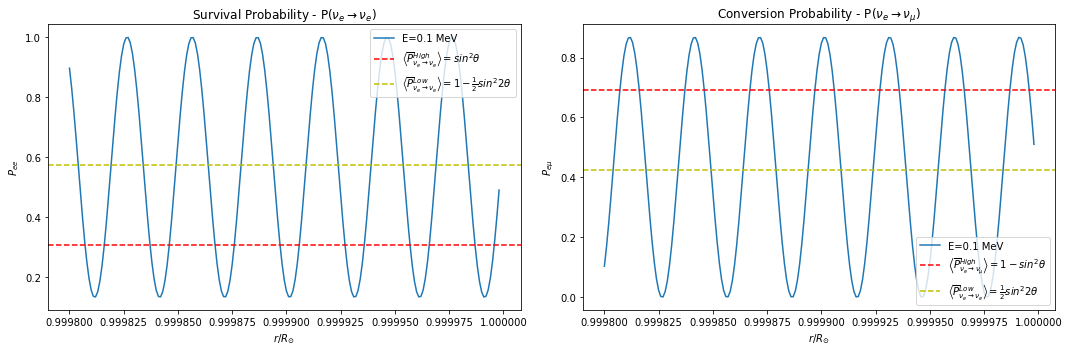

In [11]:
Plot_Probability_Solar(P_low[2][-200:-1],r_per_R_sol[-200:-1],E_low)

In [13]:
ani=Pol_Vec_Anim_Solar(P_low,B_low,r_per_R_sol[0:400],E_low)
HTML(ani.to_html5_video())

# 1. Isotropic and Monoenergetic Neutrino Gas

## 1.1. Symmetric and $\mu=$ const

In [2]:
from ODE_Isotropic_Monoenergetic import *

In [35]:
P=[0,0,1,0,0,1]
E=20 #MeV
r_i,r_f=0,10 #km
omega_max=delta_m2_31/(2*10**6)
mu_opt,mu_0 ="const", 10*omega_max

P_nu_IH,P_nubar_IH,H_vac_IH,H_nue_IH,r_IH=solver_Isotropic_Monoenergetic(P,E,r_i,r_f,"IH",mu_opt,mu_0)
P_nu_NH,P_nubar_NH,H_vac_NH,H_nue_NH,r_NH=solver_Isotropic_Monoenergetic(P,E,r_i,r_f,"NH",mu_opt,mu_0)

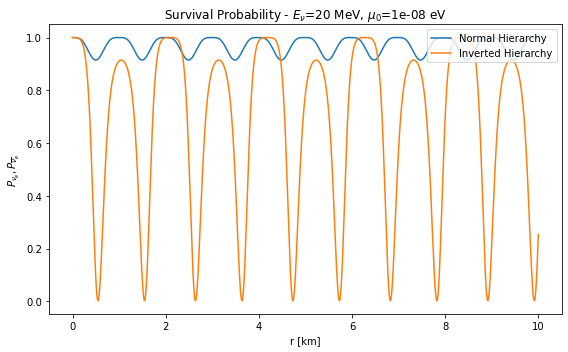

In [36]:
Plot_Probability_Isotropic(P_nu_NH,P_nu_IH,r_NH,E,mu_0)

In [6]:
ani=Pol_Vec_Anim_Isotropic(P_nu_IH,P_nubar_IH,H_vac_IH,r_IH,E,"IH")
HTML(ani.to_html5_video())

## 1.2. Symmetric and $\mu=(r)$

In [41]:
P=[0,0,1,0,0,1]
E=20 #MeV
r_i,r_f=0,500 #km
omega_max=delta_m2_31/(2*10**6)
mu_opt,mu_0 ="SN", 10*omega_max

start_time = time.time()
P_nu_IH,P_nubar_IH,H_vac_IH,H_nue_IH,r_IH=solver_Isotropic_Monoenergetic(P,E,r_i,r_f,"IH",mu_opt,mu_0)
P_nu_NH,P_nubar_NH,H_vac_NH,H_nue_NH,r_NH=solver_Isotropic_Monoenergetic(P,E,r_i,r_f,"NH",mu_opt,mu_0)
print("Took %s minutes" % ((time.time() - start_time)/60))

Took 1.1067133267720541 minutes


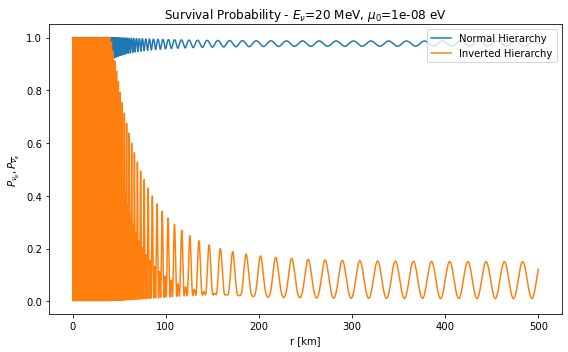

In [42]:
Plot_Probability_Isotropic(P_nu_NH,P_nu_IH,r_NH,E,mu_0)

In [7]:
ani=Pol_Vec_Anim_Isotropic_mu_Profile(P_nu_IH,P_nubar_IH,H_vac_IH,r_IH,E,mu_0,"IH")
HTML(ani.to_html5_video())

## 1.3. Asymmetric and $\mu=(r)$

In [45]:
P=[0,0,1,0,0,0.8]
E=20 #MeV
r_i,r_f=0,500 #km
omega_max=delta_m2_31/(2*1*10**6)
mu_opt,mu_0 ="SN", 10*omega_max

start_time = time.time()
P_nu_IH,P_nubar_IH,H_vac_IH,H_nue_IH,r_IH=solver_Isotropic_Monoenergetic(P,E,r_i,r_f,"IH",mu_opt,mu_0)
P_nu_NH,P_nubar_NH,H_vac_NH,H_nue_NH,r_NH=solver_Isotropic_Monoenergetic(P,E,r_i,r_f,"NH",mu_opt,mu_0)
print("Took %s minutes" % ((time.time() - start_time)/60))

Took 1.1358684817949931 minutes


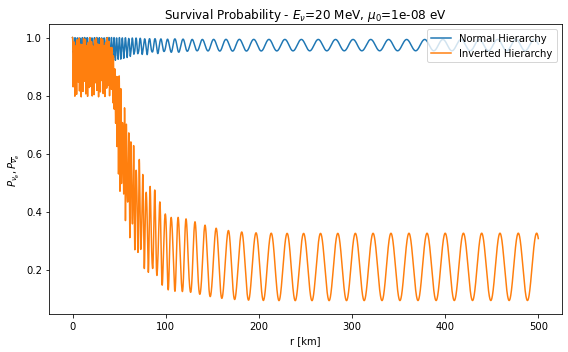

In [46]:
Plot_Probability_Isotropic(P_nu_NH,P_nu_IH,r_NH,E,mu_0)

In [48]:
ani=Pol_Vec_Anim_Isotropic_mu_Profile(P_nu_IH,P_nubar_IH,H_vac_IH,r_IH,E,mu_0,"IH")
HTML(ani.to_html5_video())

# 2. Istropic Neutrino Gas with Spectral Distribution

In [2]:
from ODE_Isotropic_Spectrum import *

nu_types=['nu_e','nu_x']
r_i,r_f=0,200 #km
E_i,E_f=1,50
E_step=0.5

#Initial spectrum
E_0=[10,15,24,24] #Mean energy in MeV
Amplitude=[1,1*10/15,1*10/24,1*10/24]

mass_ord="NH"
start_time = time.time()
E_vec,r_vec,mu_0,nu_e_time_NH,nubar_e_time_NH, nu_x_time_NH,nubar_x_time_NH,nu_NH,nubar_NH=solver_two_families(nu_types,r_i,r_f,E_i,E_f,E_step,E_0,Amplitude,mass_ord)
print("Took %s minutes" % ((time.time() - start_time)/60))

mass_ord="IH"
start_time = time.time()
E_vec,r_vec,mu_0,nu_e_time_IH,nubar_e_time_IH, nu_x_time_IH,nubar_x_time_IH,nu_IH,nubar_IH=solver_two_families(nu_types,r_i,r_f,E_i,E_f,E_step,E_0,Amplitude,mass_ord)
print("Took %s minutes" % ((time.time() - start_time)/60))

Took 5.792054319381714 minutes
Took 5.572994065284729 minutes


### Plots

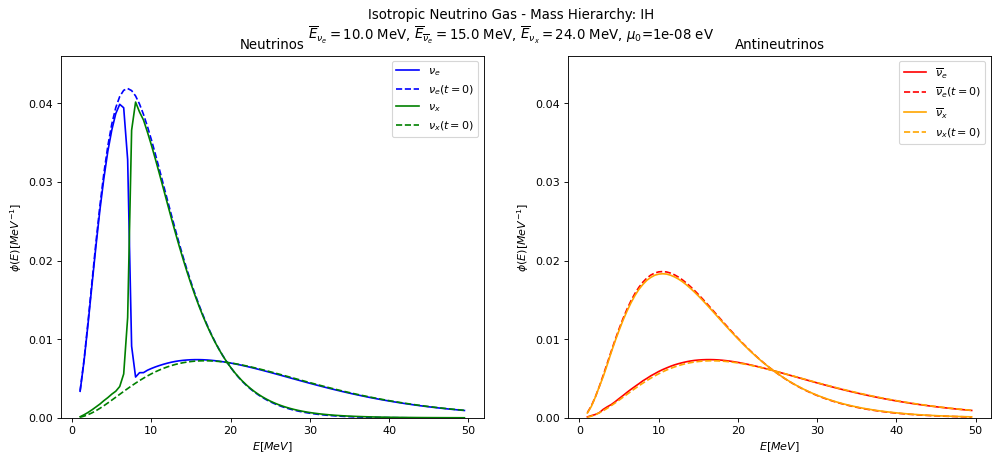

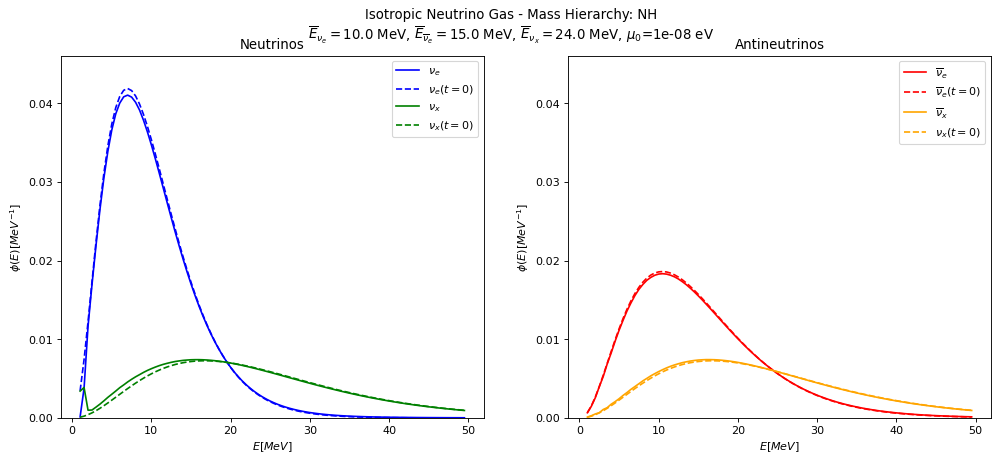

In [5]:
Plot_Spectrum(E_vec,E_0,mu_0,nu_e_time_IH,nubar_e_time_IH, nu_x_time_IH,nubar_x_time_IH,"IH")
Plot_Spectrum(E_vec,E_0,mu_0,nu_e_time_NH,nubar_e_time_NH, nu_x_time_NH,nubar_x_time_NH,"NH")

### Animations

In [9]:
anim_IH=animation_2_families_spectrum(E_vec,r_vec,nu_e_time_IH,nubar_e_time_IH, nu_x_time_IH,nubar_x_time_IH,"IH")
HTML(anim_IH.to_html5_video())

In [10]:
# Save final Spectra
#NH
np.save("Output/Final_Spectrum_configuration_1_nu_e_NH.npy",nu_e_time_NH[-1])
np.save("Output/Final_Spectrum_configuration_1_nubar_e_NH.npy",nubar_e_time_NH[-1])
np.save("Output/Final_Spectrum_configuration_1_nu_x_NH.npy",nu_x_time_NH[-1])
np.save("Output/Final_Spectrum_configuration_1_nubar_x_NH.npy",nubar_x_time_NH[-1])
#IH
np.save("Output/Final_Spectrum_configuration_1_nu_e_IH.npy",nu_e_time_IH[-1])
np.save("Output/Final_Spectrum_configuration_1_nubar_e_IH.npy",nubar_e_time_IH[-1])
np.save("Output/Final_Spectrum_configuration_1_nu_x_IH.npy",nu_x_time_IH[-1])
np.save("Output/Final_Spectrum_configuration_1_nubar_x_IH.npy",nubar_x_time_IH[-1])

# Other Plots

In [14]:
def Pol_Vec_Sol_Initial_Final(P,B,E):
    fig = plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
    ax1 = fig.add_subplot(1,2,1,projection='3d')

    B1,B2,B3=B[0][0],B[1][0],B[2][0]
    quiver_B = ax1.quiver(0, 0, 0, B1, B2, B3, arrow_length_ratio=0.05,color='r',label=r'$\vec{B}$',normalize=True)
    P1,P2,P3= P[0][0],P[1][0],P[2][0]
    quiver = ax1.quiver(0, 0, 0,P1,P2,P3, arrow_length_ratio=0.05,color='b',label=r'$\vec{P}$')
    ax1.plot(P[0][::],P[1][::], P[2][::],c='y')

    ax1.set_xlim(-1, 1)
    ax1.set_ylim(-1, 1)
    ax1.set_zlim(-1, 1)
    ax1.quiver(-0.5, 0, 0, 1, 0, 0, arrow_length_ratio=0.05,color='k')
    ax1.text(0.6,0,0, r"$\hat{e}^F_1$", color='k')
    ax1.quiver(0, -0.5, 0, 0, 1, 0, arrow_length_ratio=0.05,color='k')
    ax1.text(0,0.6,0, r"$\hat{e}^F_2$", color='k')
    ax1.quiver(0, 0, -0.5, 0, 0, 1, arrow_length_ratio=0.05,color='k')
    ax1.text(0,0,0.6, r"$\hat{e}^F_3$", color='k')
    ax1.set_title(r'Precession - Initial State - $E_\nu=%.1f$ MeV'%(E))
    ax1.legend()


    ax2 = fig.add_subplot(1,2,2,projection='3d')

    B1,B2,B3=B[0][-1],B[1][-1],B[2][-1]
    quiver_B = ax2.quiver(0, 0, 0, B1, B2, B3, arrow_length_ratio=0.05,color='r',label=r'$\vec{B}$',normalize=True)
    P1,P2,P3= P[0][-1],P[1][-1],P[2][-1]
    quiver = ax2.quiver(0, 0, 0,P1,P2,P3, arrow_length_ratio=0.05,color='b',label=r'$\vec{P}$')
    ax2.plot(P[0][::],P[1][::], P[2][::],c='y')

    ax2.set_xlim(-1, 1)
    ax2.set_ylim(-1, 1)
    ax2.set_zlim(-1, 1)
    ax2.quiver(-0.5, 0, 0, 1, 0, 0, arrow_length_ratio=0.05,color='k')
    ax2.text(0.6,0,0, r"$\hat{e}^F_1$", color='k')
    ax2.quiver(0, -0.5, 0, 0, 1, 0, arrow_length_ratio=0.05,color='k')
    ax2.text(0,0.6,0, r"$\hat{e}^F_2$", color='k')
    ax2.quiver(0, 0, -0.5, 0, 0, 1, arrow_length_ratio=0.05,color='k')
    ax2.text(0,0,0.6, r"$\hat{e}^F_3$", color='k')
    ax2.set_title(r'Precession - Final State- $E_\nu=%.1f$ MeV'%(E))
    ax2.legend()

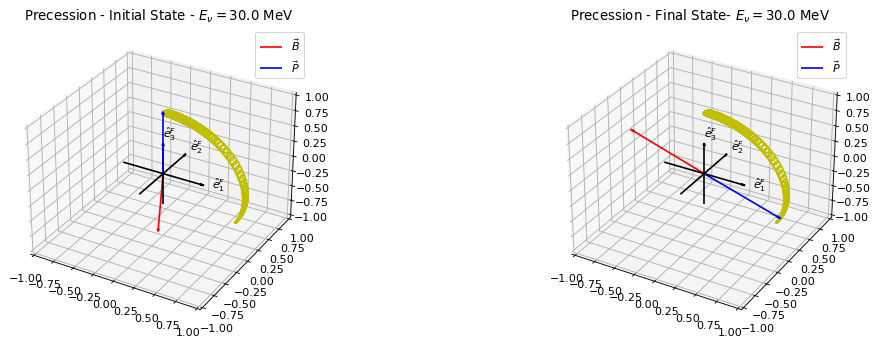

In [15]:
Pol_Vec_Sol_Initial_Final(P_high,B_high,E_high)

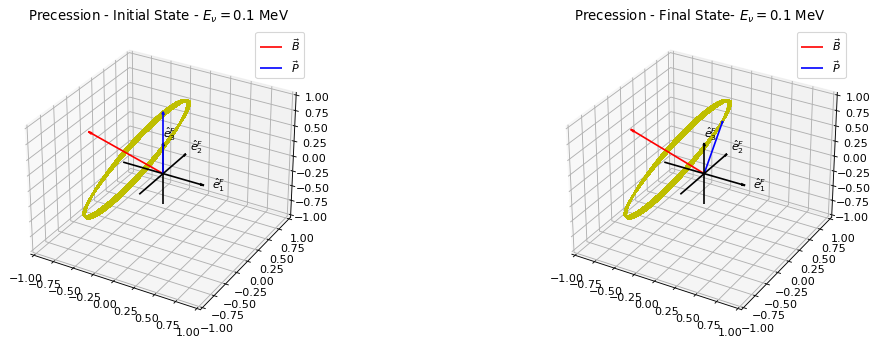

In [16]:
Pol_Vec_Sol_Initial_Final(P_low,B_low,E_low)

In [ ]:
def Pol_Vec_Isotropic_Initial_Final(Pnu,Pnubar,B,E):
    fig = plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
    ax1 = fig.add_subplot(1,2,1,projection='3d')

    B1,B2,B3=B[0][0],B[1][0],B[2][0]
    quiver_B = ax1.quiver(0, 0, 0, B1, B2, B3, arrow_length_ratio=0.05,color='r',label=r'$\vec{B}$',normalize=True)
    P1,P2,P3= Pnu[0][0],Pnu[1][0],Pnu[2][0]
    quiver = ax1.quiver(0, 0, 0,P1,P2,P3, arrow_length_ratio=0.05,color='',label=r'$\vec{P}$')
    ax1.plot(P[0][::],P[1][::], P[2][::],c='y')

    ax1.set_xlim(-1, 1)
    ax1.set_ylim(-1, 1)
    ax1.set_zlim(-1, 1)
    ax1.quiver(-0.5, 0, 0, 1, 0, 0, arrow_length_ratio=0.05,color='k')
    ax1.text(0.6,0,0, r"$\hat{e}^F_1$", color='k')
    ax1.quiver(0, -0.5, 0, 0, 1, 0, arrow_length_ratio=0.05,color='k')
    ax1.text(0,0.6,0, r"$\hat{e}^F_2$", color='k')
    ax1.quiver(0, 0, -0.5, 0, 0, 1, arrow_length_ratio=0.05,color='k')
    ax1.text(0,0,0.6, r"$\hat{e}^F_3$", color='k')
    ax1.set_title(r'Precession - Initial State - $E_\nu=%.1f$ MeV'%(E))
    ax1.legend()


    ax2 = fig.add_subplot(1,2,2,projection='3d')

    B1,B2,B3=B[0][-1],B[1][-1],B[2][-1]
    quiver_B = ax2.quiver(0, 0, 0, B1, B2, B3, arrow_length_ratio=0.05,color='r',label=r'$\vec{B}$',normalize=True)
    P1,P2,P3= P[0][-1],P[1][-1],P[2][-1]
    quiver = ax2.quiver(0, 0, 0,P1,P2,P3, arrow_length_ratio=0.05,color='b',label=r'$\vec{P}$')
    ax2.plot(P[0][::],P[1][::], P[2][::],c='y')

    ax2.set_xlim(-1, 1)
    ax2.set_ylim(-1, 1)
    ax2.set_zlim(-1, 1)
    ax2.quiver(-0.5, 0, 0, 1, 0, 0, arrow_length_ratio=0.05,color='k')
    ax2.text(0.6,0,0, r"$\hat{e}^F_1$", color='k')
    ax2.quiver(0, -0.5, 0, 0, 1, 0, arrow_length_ratio=0.05,color='k')
    ax2.text(0,0.6,0, r"$\hat{e}^F_2$", color='k')
    ax2.quiver(0, 0, -0.5, 0, 0, 1, arrow_length_ratio=0.05,color='k')
    ax2.text(0,0,0.6, r"$\hat{e}^F_3$", color='k')
    ax2.set_title(r'Precession - Final State- $E_\nu=%.1f$ MeV'%(E))
    ax2.legend()

In [37]:
def Pol_Vec_Plot_Isotropic(Pnu,Pnubar,B,E,mu_0,mass_ord):
    fig = plt.figure(figsize=(8, 5), dpi= 80, facecolor='w', edgecolor='k')
    ax1 = fig.add_subplot(1,1,1,projection='3d')
    t_i=200
    B1,B2,B3=B[0][t_i],B[1][t_i],B[2][t_i]
    #print(B1,B1,B3)
    quiver_B = ax1.quiver(0, 0, 0, B1, B2, B3, arrow_length_ratio=0.05,color='r',label=r'$\vec{B}$',normalize=True)
    P1,P2,P3= Pnu[0][t_i],Pnu[1][t_i],Pnu[2][t_i]
    quiver = ax1.quiver(0, 0, 0,P1,P2,P3, arrow_length_ratio=0.05,color='b',label=r'$\vec{P}_\nu$')
    P1,P2,P3= Pnubar[0][t_i],Pnubar[1][t_i],Pnubar[2][t_i]
    quiver = ax1.quiver(0, 0, 0,P1,P2,P3, arrow_length_ratio=0.05,color='g',label=r'$\vec{P}_{\overline{\nu}}$')
    
    ax1.plot(Pnu[0][::],Pnu[1][::], Pnu[2][::],c='y')

    ax1.set_xlim(-1, 1)
    ax1.set_ylim(-1, 1)
    ax1.set_zlim(-1, 1)
    ax1.quiver(-0.5, 0, 0, 1, 0, 0, arrow_length_ratio=0.05,color='k')
    ax1.text(0.6,0,0, r"$\hat{e}^F_1$", color='k')
    ax1.quiver(0, -0.5, 0, 0, 1, 0, arrow_length_ratio=0.05,color='k')
    ax1.text(0,0.6,0, r"$\hat{e}^F_2$", color='k')
    ax1.quiver(0, 0, -0.5, 0, 0, 1, arrow_length_ratio=0.05,color='k')
    ax1.text(0,0,0.6, r"$\hat{e}^F_3$", color='k')
    ax1.set_title(r'Precession - %s - $E_{\nu}$=%1.f MeV, $\mu_0$=%1.e eV'%(mass_ord,E,mu_0))
    ax1.legend()

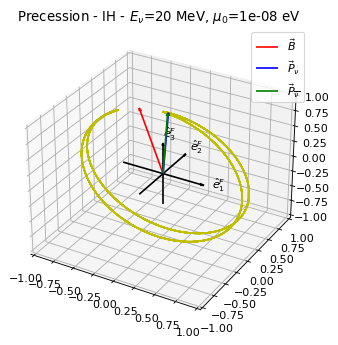

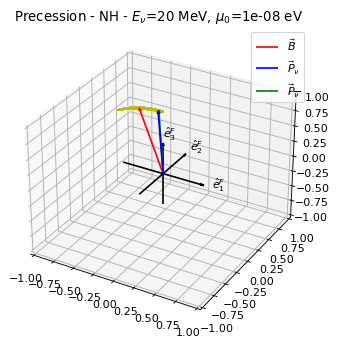

In [38]:
Pol_Vec_Plot_Isotropic(P_nu_IH,P_nubar_IH,-1*H_vac_IH,E,mu_0,"IH")
Pol_Vec_Plot_Isotropic(P_nu_NH,P_nubar_NH,H_vac_NH,E,mu_0,"NH")

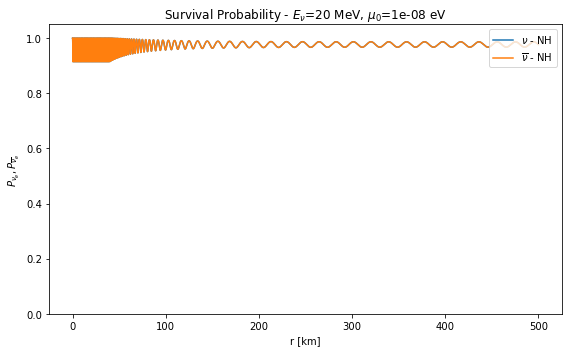

In [43]:
Plot_Probability_Isotropic_2([P_nu_NH,P_nubar_NH],[r"$\nu$ - NH",r"$\overline{\nu}$ - NH"],r_NH,E,mu_0)
Plot_Probability_Isotropic_2([P_nu_IH,P_nubar_IH],[r"$\nu$ - IH",r"$\overline{\nu}$ - IH"],r_IH,E,mu_0)

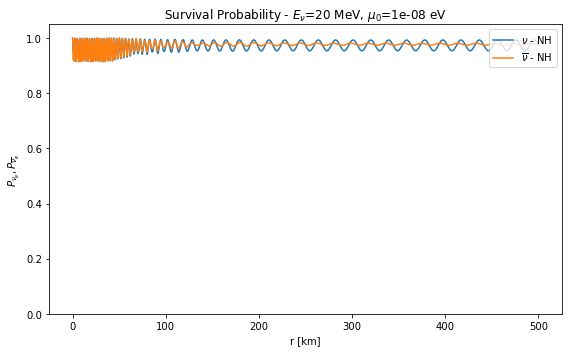

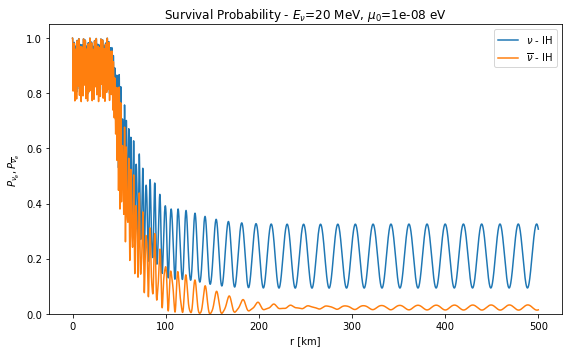

In [47]:
Plot_Probability_Isotropic_2([P_nu_NH,P_nubar_NH],[r"$\nu$ - NH",r"$\overline{\nu}$ - NH"],r_NH,E,mu_0)
Plot_Probability_Isotropic_2([P_nu_IH,P_nubar_IH],[r"$\nu$ - IH",r"$\overline{\nu}$ - IH"],r_IH,E,mu_0)